# Projeto 2 GRUPO 10



Diogo Parente 23525
Gabriel Jablonski 21958
Juciano Farias 21875

Professor: Joaquim Silva

DataSet Link: https://www.kaggle.com/datasets/rafsunahmad/world-population-growth


Para as regras de Associação:

DataSet Link: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?resource=download

---
---

# Classificação Automática

## Objetivo

Analisar o crescimento populacional das cidades entre 2022 e 2023, classificando-as em categorias de crescimento (baixo, moderado, alto) para identificar padrões significativos e auxiliar no planeamento urbano e políticas públicas.



## Algoritmos Escolhidos

- Para a tarefa de classificação, foram selecionados dois algoritmos: 
- **Random Forest e Decision Tree Classifier.**
- O Random Forest foi configurado com 100 árvores e profundidade máxima de 5
- Decision Tree Classifier foi utilizado com profundidade máxima de 5


## Critérios de Seleção de Dados

Os dados foram selecionados com base na disponibilidade de informações sobre a população das cidades ao de 2 anos, garantindo representatividade global e abrangendo um período significativo para análise de tendências.

## Preparação dos Dados

- Os dados foram preparados através dos seguintes passos:

- Conversão da coluna 'city' para formato numérico usando LabelEncoder.
 -Cálculo da taxa de crescimento percentual da população de 2022 para 2023.
- Categorização da taxa de crescimento em três classes: baixo, moderado e alto.
- Tratamento de valores ausentes e seleção de características relevantes ('population_in_2022', 'population_growthRate', 'city').

## Aplicação dos Algoritmos de ML e Avaliação dos Modelos

- Os modelos foram treinados usando os conjuntos de treino e teste. A performance foi avaliada através de:

- Matriz de confusão.
- Pontuação de precisão.
- Relatório de classificação, incluindo métricas como precisão, recall e F1-score.

In [56]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [67]:
# Carregar o conjunto de dados de vendas do supermercado
data = pd.read_csv('./world-country-populations.csv')


In [34]:
# Convertendo a coluna 'city' para numérica
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])

# Calculando a taxa de crescimento percentual da população de 2022 para 2023
df['growth_category'] = (df['population_in_2023'] - df['population_in_2022']) / df['population_in_2022']
# Definindo categorias de crescimento (por exemplo, 0: baixo, 1: moderado, 2: alto)
df['growth_category'] = pd.cut(df['growth_category'], bins=[-np.inf, 0, 0.02, np.inf], labels=[0, 1, 2])

# Preparando os dados
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
features_columns = ['population_in_2022', 'population_growthRate', 'city']
X = df[features_columns].values  # Matriz de recursos
Y = df['growth_category'].values  # Alvo
imp.fit(X)
X = imp.transform(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Treinamento do Modelo Random Forest Classifier com Ajuste de Hiperparâmetros
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
classifier.fit(X_train, Y_train)

# Avaliação do Modelo
predicted = classifier.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(Y_test, predicted))
print('Accuracy Score:', accuracy_score(Y_test, predicted))
print('Classification Report:')
print(classification_report(Y_test, predicted))

# Análise de Importância das Features (Opcional)
importances = classifier.feature_importances_
feature_importances = pd.DataFrame(importances, index=features_columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

Confusion Matrix:
[[  8   1   0]
 [  1  97   1]
 [  0   0 126]]
Accuracy Score: 0.9871794871794872
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.99      0.98      0.98        99
           2       0.99      1.00      1.00       126

    accuracy                           0.99       234
   macro avg       0.96      0.96      0.96       234
weighted avg       0.99      0.99      0.99       234

                       Importance
population_growthRate    0.902570
city                     0.049038
population_in_2022       0.048392


## Performance Geral:

- A matriz de confusão e o relatório de classificação indicam que o modelo tem uma alta precisão geral (Accuracy Score: 0.9871794871794872), sugerindo que ele é muito bom a classificar corretamente as instâncias do conjunto de teste.
- As métricas de precisão, recall e pontuação F1 para as classes 1 e 2 são todas muito altas, próximas ou iguais a 1, o que indica um desempenho quase perfeito.

In [13]:

# Treinamento do Modelo Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=5, random_state=0)
classifier.fit(X_train, Y_train)

# Avaliação do Modelo
predicted = classifier.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(Y_test, predicted))
print('Accuracy Score:', accuracy_score(Y_test, predicted))
print('Classification Report:')
print(classification_report(Y_test, predicted))

# Análise de Importância das Features (Opcional)
importances = classifier.feature_importances_
feature_importances = pd.DataFrame(importances, index=features_columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

Confusion Matrix:
[[  9   0   0]
 [  1  97   1]
 [  0   0 126]]
Accuracy Score: 0.9914529914529915
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.98      0.99        99
           2       0.99      1.00      1.00       126

    accuracy                           0.99       234
   macro avg       0.96      0.99      0.98       234
weighted avg       0.99      0.99      0.99       234

                       Importance
population_growthRate         1.0
population_in_2022            0.0
city                          0.0


## Performance Geral:


O modelo alcançou uma pontuação de precisão muito alta de aproximadamente 99.15%, o que indica que o modelo foi capaz de classificar corretamente a grande maioria das instâncias do conjunto de teste.

## Importância das Características:

- A característica population_growthRate teve a maior importância no modelo, com um score de 1.0, o que significa que ela foi o principal fator considerado pelo modelo para as previsões.
- As características population_in_2022 e city não tiveram impacto nas previsões do modelo (

---
---

# Algoritmo de Clustering

Para esta análise, utilizamos algoritmos de clusterização e regras de associação:

- **K-Means**: Este algoritmo é usado para agrupar cidades com base em características semelhantes de crescimento populacional. Os parâmetros chave incluem o número de clusters (determinado pelo método Elbow).



## Objetivo

O objetivo do clustering é identificar padrões no crescimento populacional das cidades ao longo do tempo. Buscamos agrupar cidades que compartilham características semelhantes de crescimento, o que pode auxiliar na identificação de tendências demográficas e no planejamento de recursos e serviços urbanos.

## Critérios de Seleção de Dados

Para o clustering, selecionamos características que são indicativas do crescimento populacional:

- population_in_2022: Representa a população das cidades no ano de 2022, fornecendo um ponto de dados para o crescimento recente.
- population_growthRate: A taxa de crescimento da população, que é uma medida direta da rapidez com que a população de uma cidade está aumentando ou diminuindo.

## Preparação dos Dados

Os dados foram padronizados para garantir que cada característica contribua igualmente para o resultado do algoritmo K-Means, sem ser influenciada pela escala dos dados. A padronização foi realizada usando StandardScaler do scikit-learn, que subtrai a média e divide pela variância.

## Aplicação e Avaliação do K-Means

- O algoritmo K-Means foi aplicado aos dados padronizados. 
- Utilizámos o método Elbow para determinar o número ótimo de clusters, minimizando a soma dos quadrados dentro dos clusters (WCSS). 
- O gráfico do método Elbow foi representado e o ponto de cotovelo foi identificado utilizando a classe KneeLocator

## Otimização dos Parâmetros do Algoritmo

- Através da análise do método Elbow, determinámos o número ideal de clusters para o algoritmo K-Means. 
- Este valor é crucial, pois um número muito baixo de clusters pode não capturar a complexidade dos dados, enquanto um número muito alto pode levar a um sobreajuste (overfitting), com clusters que não têm significado prático.

c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

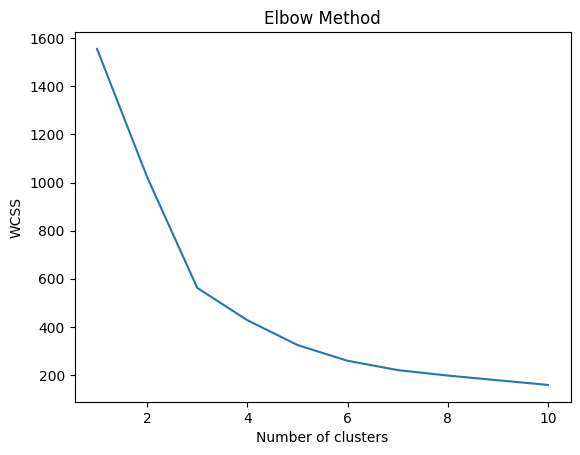

O número ótimo de clusters é: 3


In [57]:

# Escolhendo as colunas para o agrupamento
features = ['population_in_2022', 'population_growthRate']
X = df[features]

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrando o número ideal de clusters (k) usando o método Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Método Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(f"O número ótimo de clusters é: {kl.elbow}")


# Aplicação do K-Means:

In [60]:
# Aplica LabelEncoder para converter nomes de cidades em valores numéricos
le_city = LabelEncoder()
df['city_encoded'] = le_city.fit_transform(df['city'])

# Aplica K-Means com o número escolhido de clusters
k = 3  # Este é o número ótimo de clusters identificado anteriormente
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Adiciona a coluna de cluster ao dataframe e revertendo a codificação das cidades
df['city'] = le_city.inverse_transform(df['city_encoded'])

# Remove a coluna 'city_encoded' pois já cumprimos o seu propósito
df.drop('city_encoded', axis=1, inplace=True)

# Organiza as colunas para exibição
df_final = df[['city', 'population_in_2022', 'population_growthRate', 'Cluster']]

# Exibe as primeiras linhas do DataFrame
df_final.head()

c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,city,population_in_2022,population_growthRate,Cluster
0,Tokyo,37274002,-0.0021,1
1,Delhi,32065760,0.0273,1
2,Shanghai,28516903,0.0243,1
3,Dhaka,22478117,0.0325,1
4,Sao Paulo,22429799,0.0085,1


# Representação Gráfica da aplicação do K-MEANS:

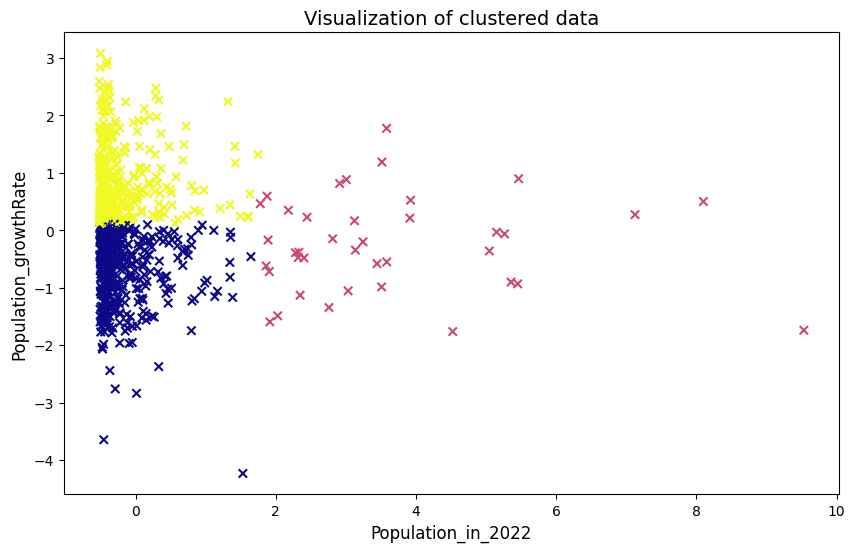

In [46]:
# Choose two dimensions to plot (e.g., population_in_2022 and population_growthRate)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='plasma', marker='x')
plt.title('Visualization of clustered data', fontsize=14)
plt.xlabel('Population_in_2022', fontsize=12)
plt.ylabel('Population_growthRate', fontsize=12)
plt.show()

# Cálcular estatisticas com base nos dados providenciados pelo K-Means:

In [43]:
# Convertendo a coluna 'city' para numérica
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])

# Selecionando as colunas relevantes
features = df[['population_in_2022', 'population_growthRate']]

# Padronizando as features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicando o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Calculando estatísticas descritivas para cada cluster
cluster_stats = df.groupby('Cluster').agg({
    'population_in_2022': ['mean', 'median'],
    'population_growthRate': ['mean', 'median']
}).reset_index()

# Renomeamos as colunas para melhor clareza
cluster_stats.columns = ['Cluster', 'Population Mean', 'Population Median', 'Growth Rate Mean', 'Growth Rate Median']

# Convertendo taxas de crescimento para percentagem e formatando para melhor legibilidade
cluster_stats['Population Mean'] = cluster_stats['Population Mean'].apply(lambda x: '{:,.0f}'.format(x))
cluster_stats['Population Median'] = cluster_stats['Population Median'].apply(lambda x: '{:,.0f}'.format(x))
cluster_stats['Growth Rate Mean'] = cluster_stats['Growth Rate Mean'].apply(lambda x: '{:.2%}'.format(x))
cluster_stats['Growth Rate Median'] = cluster_stats['Growth Rate Median'].apply(lambda x: '{:.2%}'.format(x))

# Imprimimos as estatísticas formatadas
print(cluster_stats)

   Cluster Population Mean Population Median Growth Rate Mean  \
0        0       1,940,489         1,370,131            1.17%   
1        1      15,667,860        13,964,637            1.75%   
2        2       1,890,860         1,245,790            3.26%   

  Growth Rate Median  
0              1.35%  
1              1.62%  
2              2.99%  


c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Conclusão sobre as estatísticas
## Tamanho da população
- O Cluster 1 destaca-se com uma média e mediana de população significativamente mais alta do que os outros clusters. Isto sugere que este cluster pode estar a agrupar as cidades mais populosas.
## Taxas de Crescimento
- O Cluster 2 apresenta a maior taxa média de crescimento da população (3.26%) e também a maior mediana (2.99%), indicando que as cidades deste cluster estão crescendo mais rapidamente do que as dos outros clusters.
- O Cluster 0 tem a menor taxa média e mediana de crescimento (1.17% e 1.35%, respectivamente), o que sugere que este cluster pode incluir cidades com crescimento populacional lento ou estagnado.
- O Cluster 1, apesar de ter as cidades mais populosas, tem uma taxa de crescimento moderada (1.75% de média e 1.62% de mediana).



---
---


# Regras de Associação

# Objetivo

O objetivo do projeto é identificar padrões e associações significativas entre as cidades e as linhas de produtos num conjunto de dados de vendas. Este objetivo visa compreender as preferências de compra específicas de diferentes regiões, o que pode ajudar na otimização de estratégias de marketing e gestão de inventário.

# Critérios de Seleção de Dados

Os dados foram escolhidos tendo em conta a sua relevância para o objetivo do estudo. As variáveis 'City' e 'Product line' foram selecionadas para explorar associações entre a localização geográfica dos clientes e os produtos adquiridos.

# Preparação de Dados:

Os dados nas colunas 'City' e 'Product line' foram convertidos para o formato de string.

Foi aplicada a codificação one-hot às variáveis categóricas 'City' e 'Product line', transformando-as em formato binário.

Os dados one-hot das cidades e das linhas de produtos foram combinados num único dataframe para análise.

# Aplicação e Avaliação do Algoritmo Apriori:

O algoritmo Apriori foi aplicado ao conjunto de dados combinado com um suporte mínimo de 0.01.

Foram geradas regras de associação com um limiar de confiança entre 0.3 a 0.5.

As regras foram avaliadas com base em métricas como suporte, confiança e lift, proporcionando insights sobre a força e relevância das associações encontradas.

In [69]:
# Carregar o conjunto de dados de vendas do supermercado
data = pd.read_csv('./supermarket_sales.csv')

### Analisar se um tipo específico de cliente (membros e normal) tende a comprar certas linhas de produtos mais frequentemente.

In [70]:
# Preparar os dados
data['Product line'] = data['Product line'].astype(str)
data['Customer type'] = data['Customer type'].astype(str)
data_grouped = data.groupby(['Invoice ID']).agg({'Product line': lambda x: ','.join(x),
                                                 'Customer type': 'first'}).reset_index()

# Transformar 'Product line' para o formato one-hot encoding
data_product_line_onehot = data_grouped['Product line'].str.get_dummies(sep=',')

# Transformar 'Customer type' para o formato one-hot encoding
data_customer_type_onehot = pd.get_dummies(data_grouped['Customer type'])

# Combinar os dados one-hot
data_combined_onehot = pd.concat([data_product_line_onehot, data_customer_type_onehot], axis=1)

# Aplicar o algoritmo Apriori
freq_itemsets = apriori(data_combined_onehot, min_support=0.01, use_colnames=True)

# Gerar regras de associação
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.5)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                antecedents consequents  support  confidence      lift
0  (Electronic accessories)    (Normal)    0.092    0.541176  1.084522
1     (Fashion accessories)    (Normal)    0.092    0.516854  1.035779
2      (Food and beverages)    (Member)    0.094    0.540230  1.078303
3       (Health and beauty)    (Normal)    0.079    0.519737  1.041557
4      (Home and lifestyle)    (Member)    0.083    0.518750  1.035429
5       (Sports and travel)    (Member)    0.087    0.524096  1.046101


c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Leitura dos dados obtidos:

- Electronic accessories têm uma forte associação com compras de clientes Normal:

O suporte (support) é de aproximadamente 9,2%, o que indica que cerca de 9,2% das transações incluem tanto "Electronic accessories" quanto clientes "Normal".
A confiança (confidence) é de cerca de 54,1%, o que sugere que quando "Electronic accessories" estão presentes, há uma probabilidade de 54,1% de o cliente ser "Normal".
O lift é ligeiramente maior que 1 (aproximadamente 1,08), o que sugere que a compra de "Electronic accessories" está ligeiramente associada a clientes "Normal". No entanto, o lift não é muito alto, indicando uma associação moderada.

---

### Verificar se há uma preferência de método de pagamento (por exemplo, dinheiro, cartão de crédito) que varia entre géneros.

In [71]:
# Preparar os dados
data['Product line'] = data['Product line'].astype(str)
data['Customer type'] = data['Customer type'].astype(str)
data_grouped = data.groupby(['Invoice ID']).agg({'Payment': lambda x: ','.join(x),
                                                 'Gender': 'first'}).reset_index()

# Transformar 'Product line' para o formato one-hot encoding
data_gender_onehot = data_grouped['Gender'].str.get_dummies(sep=',')

# Transformar 'Customer type' para o formato one-hot encoding
data_payment_onehot = pd.get_dummies(data_grouped['Payment'])

# Combinar os dados one-hot
data_combined_onehot = pd.concat([data_gender_onehot, data_payment_onehot], axis=1)

# Aplicar o algoritmo Apriori

freq_itemsets = apriori(data_combined_onehot, min_support=0.01, use_colnames=True)

# Gerar regras de associação
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.5)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

     antecedents consequents  support  confidence      lift
0         (Cash)    (Female)    0.178    0.517442  1.032818
1  (Credit card)    (Female)    0.163    0.524116  1.046139
2      (Ewallet)      (Male)    0.185    0.536232  1.074613


c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Leitura de dados:

- O método de pagamento Cash está associado a clientes do gênero Female:

- O suporte (support) é de aproximadamente 17,8%, o que indica que cerca de 17,8% das transações incluem tanto o método de pagamento "Cash" quanto clientes do género "Female".
- A confiança (confidence) é de aproximadamente 51,7%, o que sugere que quando o método de pagamento é "Cash", há uma probabilidade de 51,7% de o cliente ser do género "Female".
- O lift é ligeiramente maior que 1 (aproximadamente 1,03), o que indica uma associação moderada entre o método de pagamento "Cash" e clientes do género "Female".

---

### Analisar se certas linhas de produtos são mais populares em determinadas cidades.

In [72]:
# Transformar 'City' e 'Product line' para o formato one-hot encoding
data_city_onehot = pd.get_dummies(data['City'])
data_product_line_onehot = pd.get_dummies(data['Product line'])

# Combinar os dados one-hot
data_combined_onehot = pd.concat([data_city_onehot, data_product_line_onehot], axis=1)

# Aplicar o algoritmo Apriori
min_support = 0.01
freq_itemsets = apriori(data_combined_onehot, min_support=min_support, use_colnames=True)

# Gerar regras de associação
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.3)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                 antecedents  consequents  support  confidence      lift
0   (Electronic accessories)   (Mandalay)    0.055    0.323529  0.974486
1      (Fashion accessories)   (Mandalay)    0.062    0.348315  1.049140
2        (Health and beauty)   (Mandalay)    0.053    0.348684  1.050254
3       (Home and lifestyle)   (Mandalay)    0.050    0.312500  0.941265
4        (Sports and travel)   (Mandalay)    0.062    0.373494  1.124982
5   (Electronic accessories)  (Naypyitaw)    0.055    0.323529  0.986370
6      (Fashion accessories)  (Naypyitaw)    0.065    0.365169  1.113319
7       (Food and beverages)  (Naypyitaw)    0.066    0.379310  1.156434
8        (Health and beauty)  (Naypyitaw)    0.052    0.342105  1.043004
9   (Electronic accessories)     (Yangon)    0.060    0.352941  1.038062
10      (Food and beverages)     (Yangon)    0.058    0.333333  0.980392
11       (Health and beauty)     (Yangon)    0.047    0.309211  0.909443
12      (Home and lifestyle)     (Yangon)    0.065 

#### Leitura resultados obtidos:

Mandalay tem uma associação relativamente fraca com várias categorias de produtos:

- As categorias de produtos, como "Electronic accessories," "Fashion accessories," "Health and beauty," e "Sports and travel," têm confiança em torno de 32% a 37% em relação a Mandalay.
- O lift varia de aproximadamente 0,94 a 1,12, indicando associações não muito fortes. Isso sugere que essas categorias de produtos não estão fortemente associadas à cidade de Mandalay.

Naypyitaw tem associações mais fortes com algumas categorias de produtos:

- As categorias de produtos, como "Fashion accessories," "Food and beverages," e "Health and beauty," têm confiança acima de 34% em relação a Naypyitaw.
- O lift varia de aproximadamente 1,11 a 1,16, indicando associações moderadas a fortes. Isso sugere que essas categorias de produtos estão mais associadas à cidade de Naypyitaw.

Yangon tem associações variadas com diferentes categorias de produtos:

- A categoria "Home and lifestyle" tem uma confiança de aproximadamente 41% em relação a Yangon, com um lift de cerca de 1,19, indicando uma associação moderada.
- Outras categorias de produtos, como "Electronic accessories," "Food and beverages," e "Sports and travel," têm associações mais fracas com Yangon, com confiança em torno de 31% a 36% e lifts próximos a 1.

---

# Conclusão


- A escolha de um dataset relevante e representativo é fundamental para a análise. O projeto reforçou a importância de trabalhar com dados abrangentes e atualizados para obter resultados precisos e significativos.

- O uso de Random Forest e Decision Tree Classifier demonstrou a eficácia desses algoritmos em classificar dados complexos. A configuração e ajuste desses algoritmos ressaltou a necessidade de equilibrar precisão e complexidade.

- O projeto foi uma oportunidade valiosa para desenvolver habilidades técnicas em análise de dados e compreensão profunda de modelos de machine learning.

